In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 25.0 MB/s eta 0:00:00


Giá cước dự đoán: 50.0
Điểm thưởng dự đoán: 91.34920634920637


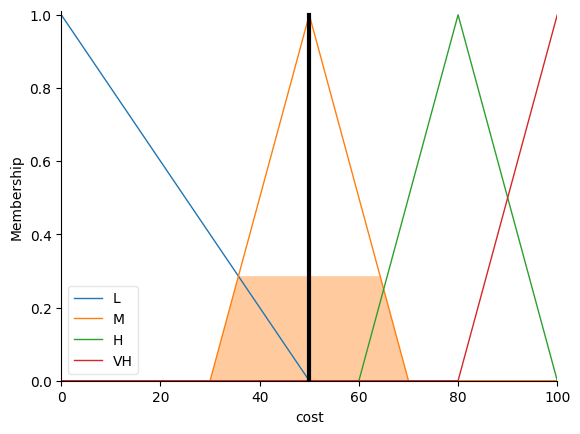

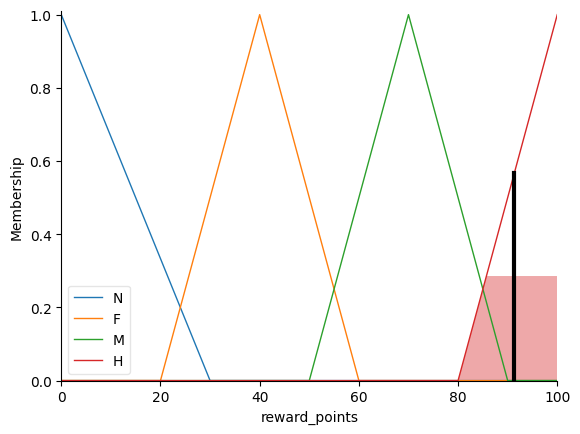

In [3]:
#GRAB:
#BÀI TẬP 1: HỆ THỐNG GIÁ TIỀN GRAB-BIKE

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ride_distance = ctrl.Antecedent(np.arange(0, 51, 1), 'ride_distance')
traffic = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic')
demand = ctrl.Antecedent(np.arange(0, 101, 1), 'demand')
weather = ctrl.Antecedent(np.arange(0, 3, 1), 'weather')
customer_rating = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'customer_rating')
punctuality = ctrl.Antecedent(np.arange(0, 101, 1), 'punctuality')

cost = ctrl.Consequent(np.arange(0, 101, 1), 'cost')
reward_points = ctrl.Consequent(np.arange(0, 101, 1), 'reward_points')

ride_distance['S'] = fuzz.trimf(ride_distance.universe, [0, 0, 3])
ride_distance['M'] = fuzz.trimf(ride_distance.universe, [2, 8, 10])
ride_distance['L'] = fuzz.trimf(ride_distance.universe, [6, 20, 50])
ride_distance['VL'] = fuzz.trimf(ride_distance.universe, [15, 50, 50])

traffic['L'] = fuzz.trimf(traffic.universe, [0, 0, 30])
traffic['M'] = fuzz.trimf(traffic.universe, [20, 70, 100])
traffic['H'] = fuzz.trimf(traffic.universe, [60, 100, 100])

demand['L'] = fuzz.trimf(demand.universe, [0, 0, 30])
demand['M'] = fuzz.trimf(demand.universe, [20, 70, 100])
demand['H'] = fuzz.trimf(demand.universe, [60, 100, 100])

weather['G'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['M'] = fuzz.trimf(weather.universe, [0, 1, 2])
weather['B'] = fuzz.trimf(weather.universe, [1, 2, 2])

customer_rating['P'] = fuzz.trimf(customer_rating.universe, [1, 1, 2.5])
customer_rating['A'] = fuzz.trimf(customer_rating.universe, [2, 3, 4])
customer_rating['G'] = fuzz.trimf(customer_rating.universe, [3.5, 5, 5])

punctuality['L'] = fuzz.trimf(punctuality.universe, [0, 0, 50])
punctuality['O'] = fuzz.trimf(punctuality.universe, [40, 80, 100])
punctuality['E'] = fuzz.trimf(punctuality.universe, [70, 100, 100])

cost['L'] = fuzz.trimf(cost.universe, [0, 0, 50])
cost['M'] = fuzz.trimf(cost.universe, [30, 50, 70])
cost['H'] = fuzz.trimf(cost.universe, [60, 80, 100])
cost['VH'] = fuzz.trimf(cost.universe, [80, 100, 100])

reward_points['N'] = fuzz.trimf(reward_points.universe, [0, 0, 30])
reward_points['F'] = fuzz.trimf(reward_points.universe, [20, 40, 60])
reward_points['M'] = fuzz.trimf(reward_points.universe, [50, 70, 90])
reward_points['H'] = fuzz.trimf(reward_points.universe, [80, 100, 100])

rule1 = ctrl.Rule(ride_distance['S'] & traffic['L'] & demand['L'], cost['L'])
rule2 = ctrl.Rule(ride_distance['S'] & traffic['M'] & demand['H'], cost['M'])
rule3 = ctrl.Rule(ride_distance['M'] & traffic['H'] & demand['H'], cost['H'])
rule4 = ctrl.Rule(ride_distance['L'] &traffic['M'] & weather['G'], cost['M'])
rule5 = ctrl.Rule(ride_distance['L'] & traffic['H'] & weather['B'], cost['VH'])
rule6 = ctrl.Rule(ride_distance['VL'] & traffic['H'] & demand['H'], cost['VH'])
rule7 = ctrl.Rule(ride_distance['M'] & traffic['L'] & demand['L'], cost['M'])
rule8 = ctrl.Rule(ride_distance['S'] & traffic['H'] & weather['B'], cost['H'])
rule9 = ctrl.Rule(ride_distance['VL'] & weather['B'], cost['VH'])
rule10 = ctrl.Rule(ride_distance['M'] & traffic['M'] & weather['M'], cost['M'])

rule11 = ctrl.Rule(customer_rating['G'] & punctuality['E'], reward_points['H'])
rule12 = ctrl.Rule(customer_rating['A'] & punctuality['O'], reward_points['M'])
rule13 = ctrl.Rule(customer_rating['P'] & punctuality['L'], reward_points['N'])
rule14 = ctrl.Rule(ride_distance['L'] & traffic['H'] & punctuality['O'], reward_points['H'])
rule15 = ctrl.Rule(ride_distance['M'] & traffic['M'] & customer_rating['G'], reward_points['M'])
rule16 = ctrl.Rule(customer_rating['P'] & punctuality['L'], reward_points['N'])
rule17 = ctrl.Rule(ride_distance['VL'] & weather['B'] & customer_rating['G'], reward_points['H'])
rule18 = ctrl.Rule(ride_distance['S'] & customer_rating['A'] & punctuality['O'], reward_points['F'])
rule19 = ctrl.Rule(ride_distance['L'] & traffic['H'] & punctuality['L'], reward_points['F'])
rule20 = ctrl.Rule(ride_distance['M'] & weather['M'] & customer_rating['G'], reward_points['M'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['ride_distance'] = 10
fuzzy_system.input['traffic'] = 80
fuzzy_system.input['demand'] = 70
fuzzy_system.input['weather'] = 0.5
fuzzy_system.input['customer_rating'] = 4.5
fuzzy_system.input['punctuality'] = 60
fuzzy_system.compute()
print('Giá cước dự đoán:', fuzzy_system.output['cost'])
print('Điểm thưởng dự đoán:', fuzzy_system.output['reward_points'])
cost.view(sim=fuzzy_system)
reward_points.view(sim=fuzzy_system)

Mức độ km: 38.65408805031448


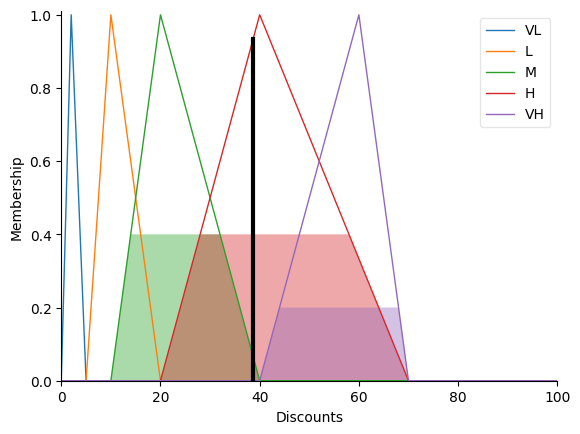

In [4]:
#BÀI 2: CHIẾN LƯỢC CHIẾT KHẤU CHO KHÁCH HÀNG Ở CÁC CỬA HÀNG SHOPEE

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Store_Rating = ctrl.Antecedent(np.arange(1.0, 5.1, 0.1), 'Store_Rating')
Sales_Volume = ctrl.Antecedent(np.arange(0, 101, 1), 'Sales_Volume')
Profit_Margin = ctrl.Antecedent(np.arange(0, 101, 1), 'Profit_Margin')
Seasonal_Event = ctrl.Antecedent(np.arange(0, 101, 1), 'Seasonal_Event')
Competitor_Discounts = ctrl.Antecedent(np.arange(0, 101, 1), 'Competitor_Discounts')

Discounts = ctrl.Consequent(np.arange(0, 101, 1), 'Discounts')

Store_Rating['L'] = fuzz.trimf(Store_Rating.universe, [1.0, 3.5, 4.0])
Store_Rating['M'] = fuzz.trimf(Store_Rating.universe, [4.0, 4.25, 4.5])
Store_Rating['H'] = fuzz.trimf(Store_Rating.universe, [4.5, 4.7, 5.0])

Sales_Volume['L'] = fuzz.trimf(Sales_Volume.universe, [0, 0, 50])
Sales_Volume['M'] = fuzz.trimf(Sales_Volume.universe, [0, 50, 100])
Sales_Volume['H'] = fuzz.trimf(Sales_Volume.universe, [50, 100, 100])

Profit_Margin['L'] = fuzz.trimf(Profit_Margin.universe, [0, 0, 50])
Profit_Margin['M'] = fuzz.trimf(Profit_Margin.universe, [0, 50, 100])
Profit_Margin['H'] = fuzz.trimf(Profit_Margin.universe, [50, 100, 100])

Seasonal_Event['N'] = fuzz.trimf(Seasonal_Event.universe, [0, 0, 50])
Seasonal_Event['M'] = fuzz.trimf(Seasonal_Event.universe, [0, 50, 100])
Seasonal_Event['H'] = fuzz.trimf(Seasonal_Event.universe, [50, 100, 100])

Competitor_Discounts['L'] = fuzz.trimf(Competitor_Discounts.universe, [0, 0, 50])
Competitor_Discounts['M'] = fuzz.trimf(Competitor_Discounts.universe, [0, 50, 100])
Competitor_Discounts['H'] = fuzz.trimf(Competitor_Discounts.universe, [50, 100, 100])

Discounts['VL'] = fuzz.trimf(Discounts.universe, [0, 2, 5])
Discounts['L'] = fuzz.trimf(Discounts.universe, [5, 10, 20])
Discounts['M'] = fuzz.trimf(Discounts.universe, [10, 20, 40])
Discounts['H'] = fuzz.trimf(Discounts.universe, [20, 40, 70])
Discounts['VH'] = fuzz.trimf(Discounts.universe, [40, 60, 70])

rule1 = ctrl.Rule(Store_Rating['H'] & Sales_Volume['H'] & Profit_Margin['H'], Discounts['VL'])
rule2 = ctrl.Rule(Store_Rating['L'] & Sales_Volume['L'] & Profit_Margin['H'], Discounts['H'])
rule3 = ctrl.Rule(Seasonal_Event['H'] & Competitor_Discounts['H'], Discounts['H'])
rule4 = ctrl.Rule(Store_Rating['M'] & Sales_Volume['M'] & Profit_Margin['M'], Discounts['M'])
rule5 = ctrl.Rule(Competitor_Discounts['L'] & Profit_Margin['L'] & Sales_Volume['H'], Discounts['VL'])
rule6 = ctrl.Rule(Store_Rating['L'] & Seasonal_Event['N'], Discounts['M'])
rule7 = ctrl.Rule(Sales_Volume['L'] & Profit_Margin['L'], Discounts['VH'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['Store_Rating'] = 4.3
fuzzy_system.input['Sales_Volume'] = 40
fuzzy_system.input['Profit_Margin'] = 20
fuzzy_system.input['Seasonal_Event'] = 70
fuzzy_system.input['Competitor_Discounts'] = 90
fuzzy_system.compute()
print('Mức độ km:', fuzzy_system.output['Discounts'])
Discounts.view(sim=fuzzy_system)

Mức chiết khấu đề xuất: 24.08333333333333


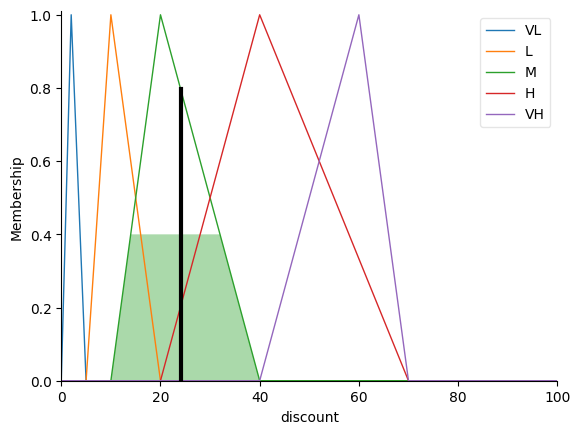

In [5]:
#BÀI 3: KẾ HOẠCH CHIẾN LƯỢC BÁN HÀNG CỦA SHOPEE DÀNH CHO CÁC CỬA HÀNG

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand = ctrl.Antecedent(np.arange(0, 101, 1), 'demand')
pressure = ctrl.Antecedent(np.arange(0, 101, 1), 'pressure')
reputation = ctrl.Antecedent(np.arange(1.0, 5.1, 0.1), 'reputation')
profit = ctrl.Antecedent(np.arange(0, 101, 1), 'profit')
seasonal_deman = ctrl.Antecedent(np.arange(0, 101, 1), 'seasonal_deman')

discount = ctrl.Consequent(np.arange(0, 101, 1), 'discount')

demand['L'] = fuzz.trimf(demand.universe, [0, 0, 30])
demand['M'] = fuzz.trimf(demand.universe, [20, 70, 100])
demand['H'] = fuzz.trimf(demand.universe, [60, 100, 100])

pressure['L'] = fuzz.trimf(pressure.universe, [0, 0, 50])
pressure['M'] = fuzz.trimf(pressure.universe, [0, 50, 100])
pressure['H'] = fuzz.trimf(pressure.universe, [50, 100, 100])

reputation['L'] = fuzz.trimf(reputation.universe, [1.0, 3.5, 4.0])
reputation['M'] = fuzz.trimf(reputation.universe, [4.0, 4.25, 4.5])
reputation['H'] = fuzz.trimf(reputation.universe, [4.5, 4.7, 5.0])

profit['L'] = fuzz.trimf(profit.universe, [0, 0, 50])
profit['M'] = fuzz.trimf(profit.universe, [0, 50, 100])
profit['H'] = fuzz.trimf(profit.universe, [50, 100, 100])

seasonal_deman['N'] = fuzz.trimf(seasonal_deman.universe, [0, 0, 50])
seasonal_deman['M'] = fuzz.trimf(seasonal_deman.universe, [0, 50, 100])
seasonal_deman['H'] = fuzz.trimf(seasonal_deman.universe, [50, 100, 100])

discount['VL'] = fuzz.trimf(discount.universe, [0, 2, 5])
discount['L'] = fuzz.trimf(discount.universe, [5, 10, 20])
discount['M'] = fuzz.trimf(discount.universe, [10, 20, 40])
discount['H'] = fuzz.trimf(discount.universe, [20, 40, 70])
discount['VH'] = fuzz.trimf(discount.universe, [40, 60, 70])

rule1 = ctrl.Rule(demand['H'] & pressure['L'] & profit['L'], discount['L'])
rule2 = ctrl.Rule(demand['L'] & pressure['H'] & profit['H'], discount['H'])
rule3 = ctrl.Rule(reputation['H'] & profit['M'] & seasonal_deman['H'], discount['M'])
rule4 = ctrl.Rule(pressure['H'] & seasonal_deman['H'] & profit['H'], discount['VH'])
rule5 = ctrl.Rule(reputation['L'] & demand['M'] & profit['L'], discount['M'])
rule6 = ctrl.Rule(demand['H'] & seasonal_deman['N'], discount['VL'])
rule7 = ctrl.Rule(profit['H'] & pressure['M'] & seasonal_deman['M'], discount['M'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['demand'] = 70
fuzzy_system.input['pressure'] = 40
fuzzy_system.input['reputation'] = 4.2
fuzzy_system.input['profit'] = 70
fuzzy_system.input['seasonal_deman'] = 70
fuzzy_system.compute()
print('Mức chiết khấu đề xuất:', fuzzy_system.output['discount'])
discount.view(sim=fuzzy_system)

Đơn hàng kết hợp: 8.366666666666667
Ưu tiên giao hàng: 5.0


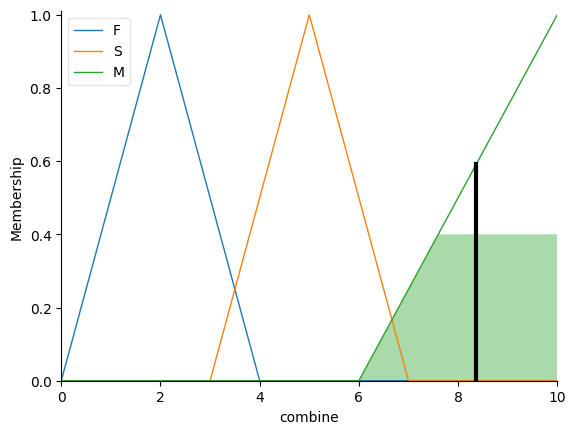

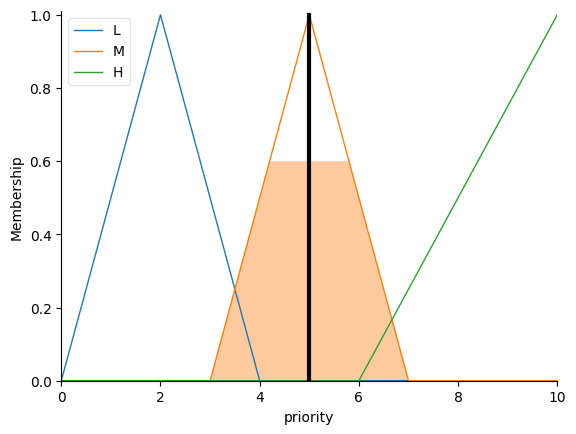

In [7]:
#BÀI 4: Tối ưu hóa thời gian giao hàng và tăng thu nhập cho tài xế

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

order_density = ctrl.Antecedent(np.arange(0, 101, 1), 'order_density')
delivery_urgency = ctrl.Antecedent(np.arange(0, 101, 1), 'delivery_urgency')
load = ctrl.Antecedent(np.arange(0, 101, 1), 'load')
traffic = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic')
profit = ctrl.Antecedent(np.arange(0, 101, 1), 'profit')

combine = ctrl.Consequent(np.arange(0, 11, 1), 'combine')
priority = ctrl.Consequent(np.arange(0, 11, 1), 'priority')

order_density['L'] = fuzz.trimf(order_density.universe, [0, 0, 50])
order_density['M'] = fuzz.trimf(order_density.universe, [0, 50, 100])
order_density['H'] = fuzz.trimf(order_density.universe, [50, 100, 100])

delivery_urgency['L'] = fuzz.trimf(delivery_urgency.universe, [0, 0, 50])
delivery_urgency['M'] = fuzz.trimf(delivery_urgency.universe, [0, 50, 100])
delivery_urgency['H'] = fuzz.trimf(delivery_urgency.universe, [50, 100, 100])

load['L'] = fuzz.trimf(load.universe, [0, 0, 50])
load['M'] = fuzz.trimf(load.universe, [0, 50, 100])
load['H'] = fuzz.trimf(load.universe, [50, 100, 100])

traffic['L'] = fuzz.trimf(traffic.universe, [0, 0, 50])
traffic['M'] = fuzz.trimf(traffic.universe, [0, 50, 100])
traffic['H'] = fuzz.trimf(traffic.universe, [50, 100, 100])

profit['L'] = fuzz.trimf(profit.universe, [0, 0, 50])
profit['M'] = fuzz.trimf(profit.universe, [0, 50, 100])
profit['H'] = fuzz.trimf(profit.universe, [50, 100, 100])

combine['F'] = fuzz.trimf(combine.universe, [0, 2, 4])
combine['S'] = fuzz.trimf(combine.universe, [3, 5, 7])
combine['M'] = fuzz.trimf(combine.universe, [6, 10, 10])

priority['L'] = fuzz.trimf(priority.universe, [0, 2, 4])
priority['M'] = fuzz.trimf(priority.universe, [3, 5, 7])
priority['H'] = fuzz.trimf(priority.universe, [6, 10, 10])

rule1 = ctrl.Rule(order_density['H'] & load['L'] & traffic['L'], combine['M'])
rule2 = ctrl.Rule(order_density['M'] & traffic['H'] & delivery_urgency['M'], combine['S'])
rule3 = ctrl.Rule(load['H'] & order_density['H'] & profit['M'], combine['S'])
rule4 = ctrl.Rule(order_density['L'] & delivery_urgency['H'] & traffic['M'], combine['S'])
rule5 = ctrl.Rule(profit['H'] & delivery_urgency['H'] & traffic['H'], combine['S'])

rule6 = ctrl.Rule(delivery_urgency['H'] & profit['H'], priority['H'])
rule7 = ctrl.Rule(delivery_urgency['M'] & traffic['M'], priority['M'])
rule8 = ctrl.Rule(delivery_urgency['L'] & order_density['H'] & profit['L'], priority['L'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['order_density'] = 80
fuzzy_system.input['delivery_urgency'] = 50
fuzzy_system.input['load'] = 30
fuzzy_system.input['traffic'] = 30
fuzzy_system.input['profit'] = 40
fuzzy_system.compute()
print('Đơn hàng kết hợp:', fuzzy_system.output['combine'])
print('Ưu tiên giao hàng:', fuzzy_system.output['priority'])
combine.view(sim=fuzzy_system)
priority.view(sim=fuzzy_system)

4.700000000000002


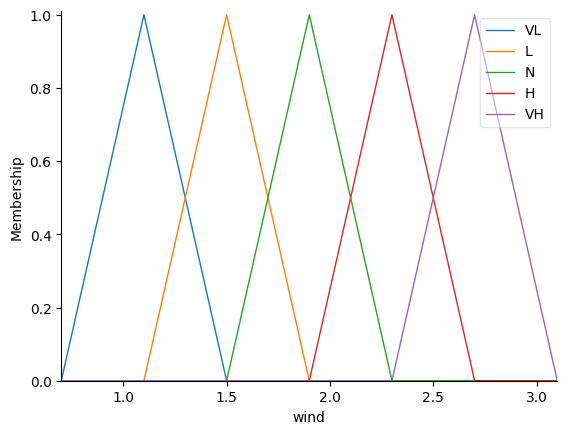

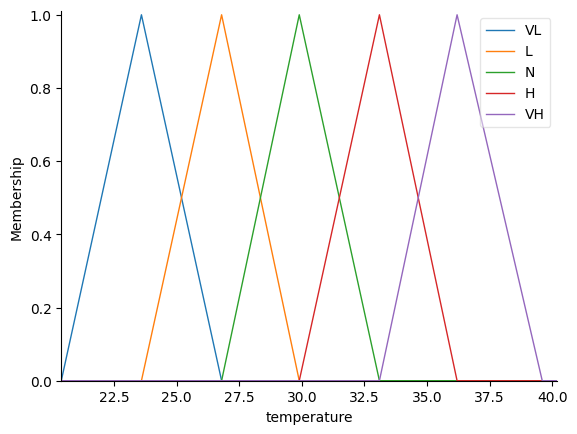

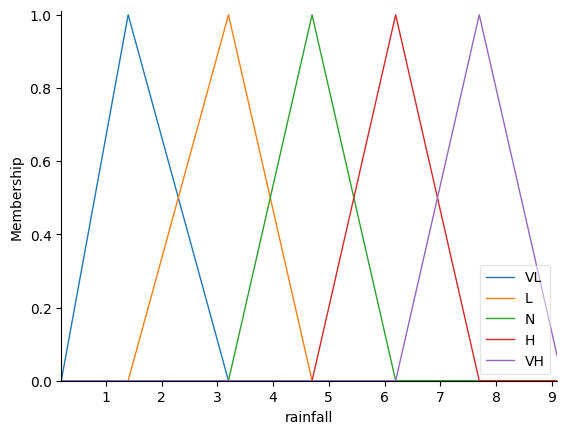

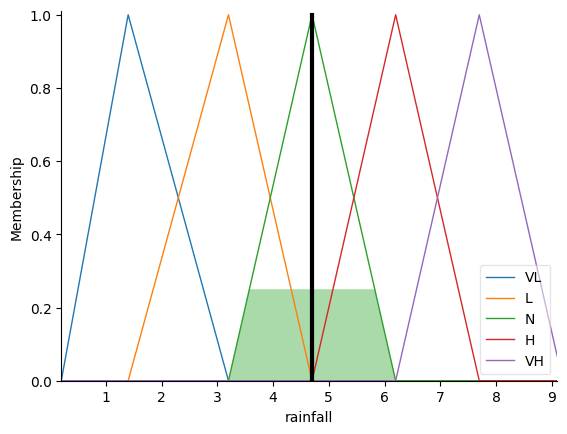

In [ ]:
#Ví dụ 2.1: Tiên đoán lượng mưa dựa vào logic mờ

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

wind['VL'] = fuzz.trimf(wind.universe, [0.7,1.1,1.5])
wind['L'] = fuzz.trimf(wind.universe, [1.1,1.5,1.9])
wind['N'] = fuzz.trimf(wind.universe, [1.5,1.9,2.3])
wind['H'] = fuzz.trimf(wind.universe, [1.9,2.3,2.7])
wind['VH'] = fuzz.trimf(wind.universe, [2.3,2.7,3.1])

temperature['VL'] = fuzz.trimf(temperature.universe, [20.4,23.6,26.8])
temperature['L'] = fuzz.trimf(temperature.universe, [23.6,26.8,29.9])
temperature['N'] = fuzz.trimf(temperature.universe, [26.8,29.9,33.1])
temperature['H'] = fuzz.trimf(temperature.universe, [29.9,33.1,36.2])
temperature['VH'] = fuzz.trimf(temperature.universe, [33.1,36.2,39.6])

rainfall['VL'] = fuzz.trimf(rainfall.universe, [0.2,1.4,3.2])
rainfall['L'] = fuzz.trimf(rainfall.universe, [1.4,3.2,4.7])
rainfall['N'] = fuzz.trimf(rainfall.universe, [3.2,4.7,6.2])
rainfall['H'] = fuzz.trimf(rainfall.universe, [4.7,6.2,7.7])
rainfall['VH'] = fuzz.trimf(rainfall.universe, [6.2,7.7,9.2])

wind.view()
temperature.view()
rainfall.view()

rule1 = ctrl.Rule(wind['VL'] & temperature['VH'], rainfall['VL'])
rule2 = ctrl.Rule(wind['L'] & temperature['H'], rainfall['L'])
rule3 = ctrl.Rule(wind['N'] & temperature['N'], rainfall['N'])
rule4 = ctrl.Rule(wind['H'] & temperature['L'], rainfall['H'])
rule5 = ctrl.Rule(wind['VH'] & temperature['VL'], rainfall['VH'])
rule6 = ctrl.Rule(wind['VH'] & temperature['VH'], rainfall['VL'])

rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['wind'] = 2.2
rainfalling.input['temperature'] = 30
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)


Nguy cơ mắc tiểu đường: 79.00096562540223


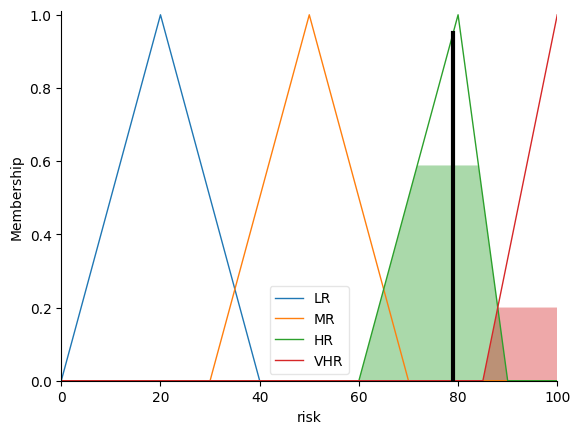

In [8]:
#Ví dụ 2.2:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

blood_sugar = ctrl.Antecedent(np.arange(50, 251, 1), 'blood_sugar')
bmi = ctrl.Antecedent(np.arange(10, 41, 1), 'bmi')
urination = ctrl.Antecedent(np.arange(0, 11, 1), 'urination')
fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')

risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

blood_sugar['L'] = fuzz.trimf(blood_sugar.universe, [50, 80, 120])
blood_sugar['N'] = fuzz.trimf(blood_sugar.universe, [80, 120, 200])
blood_sugar['H'] = fuzz.trimf(blood_sugar.universe, [120, 200, 250])
blood_sugar['VH'] = fuzz.trimf(blood_sugar.universe, [200, 250, 250])

bmi['U'] = fuzz.trimf(bmi.universe, [10, 18.5, 24.9])
bmi['N'] = fuzz.trimf(bmi.universe, [18.5, 24.9, 29.9])
bmi['O'] = fuzz.trimf(bmi.universe, [25, 29.9, 35])
bmi['OB'] = fuzz.trimf(bmi.universe, [30, 40, 40])

urination['R'] = fuzz.trimf(urination.universe, [0, 2, 4])
urination['S'] = fuzz.trimf(urination.universe, [3, 5, 7])
urination['O'] = fuzz.trimf(urination.universe, [6, 10, 10])

fatigue['L'] = fuzz.trimf(fatigue.universe, [0, 2, 4])
fatigue['M'] = fuzz.trimf(fatigue.universe, [3, 5, 7])
fatigue['H'] = fuzz.trimf(fatigue.universe, [6, 10, 10])

risk['LR'] = fuzz.trimf(risk.universe, [0, 20, 40])
risk['MR'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['HR'] = fuzz.trimf(risk.universe, [60, 80, 90])
risk['VHR'] = fuzz.trimf(risk.universe, [85, 100, 100])

rule1 = ctrl.Rule(blood_sugar['VH'] & urination['O'], risk['VHR'])
rule2 = ctrl.Rule(blood_sugar['VH'] & urination['S'], risk['HR'])
rule3 = ctrl.Rule(blood_sugar['H'] & urination['O'], risk['HR'])
rule4 = ctrl.Rule(blood_sugar['N'] & urination['R'], risk['LR'])

rule5 = ctrl.Rule(blood_sugar['VH'] & bmi['OB'], risk['VHR'])
rule6 = ctrl.Rule(blood_sugar['VH'] & bmi['O'], risk['HR'])
rule7 = ctrl.Rule(blood_sugar['H'] & bmi['O'], risk['HR'])
rule8 = ctrl.Rule(blood_sugar['H'] & bmi['N'], risk['MR'])
rule9 = ctrl.Rule(blood_sugar['N'] & bmi['N'], risk['LR'])

rule10 = ctrl.Rule(blood_sugar['VH'] & fatigue['H'], risk['VHR'])
rule11 = ctrl.Rule(blood_sugar['H'] & fatigue['H'], risk['HR'])
rule12 = ctrl.Rule(blood_sugar['H'] & fatigue['M'], risk['MR'])
rule13 = ctrl.Rule(blood_sugar['N'] & fatigue['L'], risk['LR'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['blood_sugar'] = 210
fuzzy_system.input['bmi'] = 32
fuzzy_system.input['urination'] = 8
fuzzy_system.input['fatigue'] = 7
fuzzy_system.compute()
print('Nguy cơ mắc tiểu đường:', fuzzy_system.output['risk'])
risk.view(sim=fuzzy_system)


Giá cuối cùng: 9.222222222222221


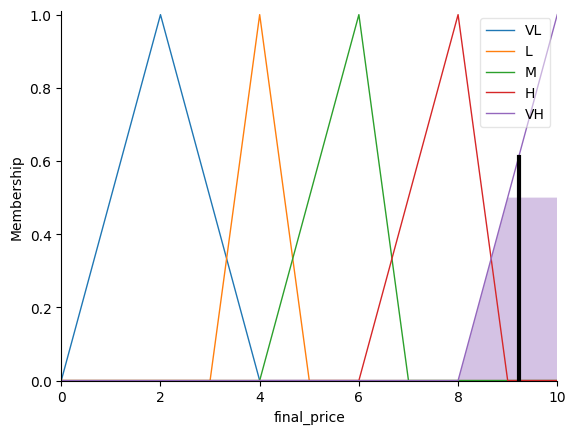

In [9]:
#Ví dụ: 2.3:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand = ctrl.Antecedent(np.arange(0, 11, 1), 'demand')
competitor_pricing = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pricing')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stock_level')

final_price = ctrl.Consequent(np.arange(0, 11, 1), 'final_price')

demand['L'] = fuzz.trimf(demand.universe, [0, 2, 4])
demand['M'] = fuzz.trimf(demand.universe, [3, 5, 7])
demand['H'] = fuzz.trimf(demand.universe, [6, 9, 10])

competitor_pricing['L'] = fuzz.trimf(competitor_pricing.universe, [0, 2, 4])
competitor_pricing['M'] = fuzz.trimf(competitor_pricing.universe, [3, 5, 7])
competitor_pricing['H'] = fuzz.trimf(competitor_pricing.universe, [6, 10, 10])

production_cost['L'] = fuzz.trimf(production_cost.universe, [0, 2, 4])
production_cost['M'] = fuzz.trimf(production_cost.universe, [3, 5, 7])
production_cost['H'] = fuzz.trimf(production_cost.universe, [6, 10, 10])

seasonality['OP'] = fuzz.trimf(seasonality.universe, [0, 2, 4])
seasonality['N'] = fuzz.trimf(seasonality.universe, [3, 5, 7])
seasonality['P'] = fuzz.trimf(seasonality.universe, [6, 10, 10])

stock_level['L'] = fuzz.trimf(stock_level.universe, [0, 2, 4])
stock_level['M'] = fuzz.trimf(stock_level.universe, [3, 5, 7])
stock_level['H'] = fuzz.trimf(stock_level.universe, [6, 10, 10])

final_price['VL'] = fuzz.trimf(final_price.universe, [0, 2, 4])
final_price['L'] = fuzz.trimf(final_price.universe, [3, 4, 5])
final_price['M'] = fuzz.trimf(final_price.universe, [4, 6, 7])
final_price['H'] = fuzz.trimf(final_price.universe, [6, 8, 9])
final_price['VH'] = fuzz.trimf(final_price.universe, [8, 10, 10])

rule1 = ctrl.Rule(demand['H'] & competitor_pricing['H'] & stock_level['L'], final_price['VH'])
rule2 = ctrl.Rule(demand['H'] & seasonality['P'] & stock_level['L'], final_price['VH'])
rule3 = ctrl.Rule(demand['M'] & production_cost['H'] & stock_level['L'], final_price['VH'])
rule4 = ctrl.Rule(demand['H'] & competitor_pricing['M'] & stock_level['M'], final_price['H'])
rule5 = ctrl.Rule(demand['M'] & competitor_pricing['H'] & stock_level['L'], final_price['H'])
rule6 = ctrl.Rule(demand['M'] & production_cost['M'] & stock_level['M'], final_price['M'])
rule7 = ctrl.Rule(demand['L'] & competitor_pricing['L'] & stock_level['H'], final_price['L'])
rule8 = ctrl.Rule(demand['L'] & seasonality['OP'] & stock_level['H'], final_price['L'])
rule9 = ctrl.Rule(demand['L'] & competitor_pricing['L'] & stock_level['H'], final_price['VL'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['demand'] = 8
fuzzy_system.input['competitor_pricing'] = 6
fuzzy_system.input['production_cost'] = 7
fuzzy_system.input['seasonality'] = 9
fuzzy_system.input['stock_level'] = 3
fuzzy_system.compute()
print('Giá cuối cùng:', fuzzy_system.output['final_price'])
final_price.view(sim=fuzzy_system)

TG giặt: 36.53787878787879
Mực nước: 6.285714285714286


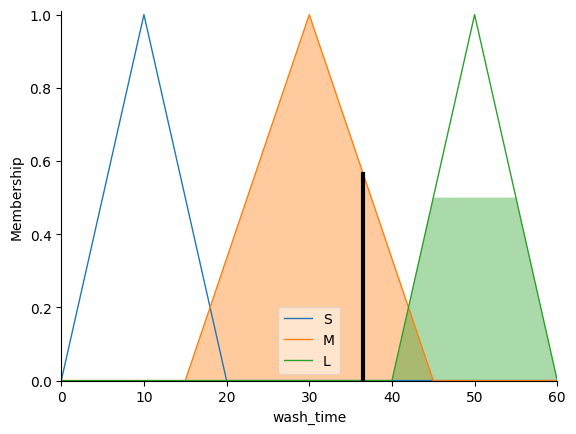

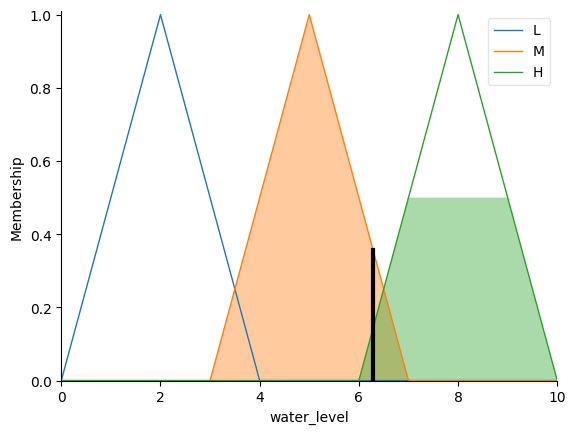

In [11]:
#Ví dụ 2.4:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

load = ctrl.Antecedent(np.arange(0, 11, 1), 'load')
dirt_level = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt_level')
fabric_type = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric_type')

wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')
water_level = ctrl.Consequent(np.arange(0, 11, 1), 'water_level')

load['S'] = fuzz.trimf(load.universe, [0, 2, 4])
load['M'] = fuzz.trimf(load.universe, [3, 5, 7])
load['L'] = fuzz.trimf(load.universe, [6, 8, 10])

dirt_level['L'] = fuzz.trimf(dirt_level.universe, [0, 2, 4])
dirt_level['M'] = fuzz.trimf(dirt_level.universe, [3, 5, 7])
dirt_level['H'] = fuzz.trimf(dirt_level.universe, [6, 8, 10])

fabric_type['D'] = fuzz.trimf(fabric_type.universe, [0, 2, 4])
fabric_type['N'] = fuzz.trimf(fabric_type.universe, [3, 5, 7])
fabric_type['H'] = fuzz.trimf(fabric_type.universe, [6, 8, 10])

wash_time['S'] = fuzz.trimf(wash_time.universe, [0, 10, 20])
wash_time['M'] = fuzz.trimf(wash_time.universe, [15, 30, 45])
wash_time['L'] = fuzz.trimf(wash_time.universe, [40, 50, 60])

water_level['L'] = fuzz.trimf(water_level.universe, [0, 2, 4])
water_level['M'] = fuzz.trimf(water_level.universe, [3, 5, 7])
water_level['H'] = fuzz.trimf(water_level.universe, [6, 8, 10])

rule1 = ctrl.Rule(load['S'] & dirt_level['L'], (wash_time['S'], water_level['L']))
rule2 = ctrl.Rule(load['S'] & dirt_level['M'], (wash_time['M'], water_level['M']))
rule3 = ctrl.Rule(load['S'] & dirt_level['H'], (wash_time['L'], water_level['M']))
rule4 = ctrl.Rule(load['M'] & dirt_level['L'], (wash_time['M'], water_level['M']))
rule5 = ctrl.Rule(load['M'] & dirt_level['M'], (wash_time['L'], water_level['M']))
rule6 = ctrl.Rule(load['M'] & dirt_level['H'], (wash_time['L'], water_level['H']))
rule7 = ctrl.Rule(load['L'] & dirt_level['L'], (wash_time['M'], water_level['H']))
rule8 = ctrl.Rule(load['L'] & dirt_level['M'], (wash_time['L'], water_level['H']))
rule9 = ctrl.Rule(load['L'] & dirt_level['H'], (wash_time['L'], water_level['H']))

rule10 = ctrl.Rule(fabric_type['D'], (wash_time['S'], water_level['L']))
rule11 = ctrl.Rule(fabric_type['N'], (wash_time['M'], water_level['M']))
rule12 = ctrl.Rule(fabric_type['H'], (wash_time['L'], water_level['H']))

rule13 = ctrl.Rule(load['L'] & dirt_level['H'] & fabric_type['H'], (wash_time['L'], water_level['H']))
rule14 = ctrl.Rule(load['S'] & dirt_level['L'] & fabric_type['D'], (wash_time['S'], water_level['L']))
rule15 = ctrl.Rule(load['M'] & dirt_level['M'] & fabric_type['N'], (wash_time['M'], water_level['M']))

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['load'] = 7
fuzzy_system.input['dirt_level'] = 6
fuzzy_system.input['fabric_type'] = 5
fuzzy_system.compute()
print('TG giặt:', fuzzy_system.output['wash_time'])
print('Mực nước:', fuzzy_system.output['water_level'])
wash_time.view(sim=fuzzy_system)
water_level.view(fuzzy_system)

Tốc độ quạt: 62.777777777777764
Mức độ làm mát: 69.16666666666669


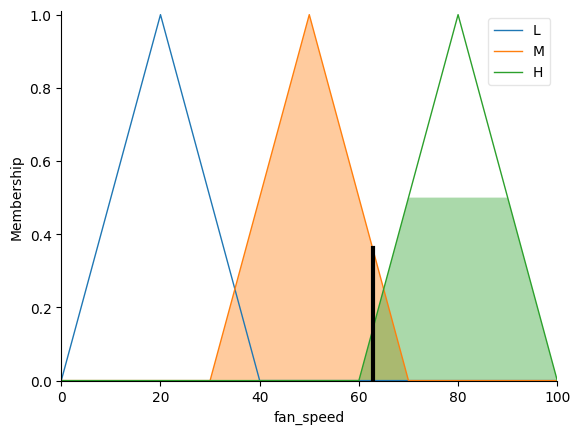

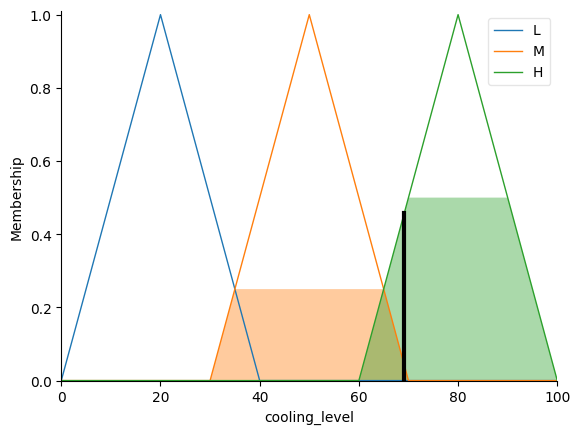

In [12]:
#Ví dụ 2.5:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(16, 36, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(1, 11, 1), 'people')

fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 101, 1), 'cooling_level')

temperature['C'] = fuzz.trimf(temperature.universe, [16, 18, 22])
temperature['CL'] = fuzz.trimf(temperature.universe, [20, 22, 25])
temperature['CM'] = fuzz.trimf(temperature.universe, [23, 25, 27])
temperature['W'] = fuzz.trimf(temperature.universe, [26, 28, 32])
temperature['H'] = fuzz.trimf(temperature.universe, [30, 34, 35])

humidity['L'] = fuzz.trimf(humidity.universe, [20, 30, 50])
humidity['M'] = fuzz.trimf(humidity.universe, [40, 60, 80])
humidity['H'] = fuzz.trimf(humidity.universe, [70, 90, 100])

people['F'] = fuzz.trimf(people.universe, [1, 2, 4])
people['M'] = fuzz.trimf(people.universe, [3, 5, 7])
people['MA'] = fuzz.trimf(people.universe, [6, 8, 10])

fan_speed['L'] = fuzz.trimf(fan_speed.universe, [0, 20, 40])
fan_speed['M'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['H'] = fuzz.trimf(fan_speed.universe, [60, 80, 100])

cooling_level['L'] = fuzz.trimf(cooling_level.universe, [0, 20, 40])
cooling_level['M'] = fuzz.trimf(cooling_level.universe, [30, 50, 70])
cooling_level['H'] = fuzz.trimf(cooling_level.universe, [60, 80, 100])

rule1 = ctrl.Rule(temperature['C'], fan_speed['L'])
rule2 = ctrl.Rule(temperature['CL'], fan_speed['L'])
rule3 = ctrl.Rule(temperature['CM'], fan_speed['M'])
rule4 = ctrl.Rule(temperature['W'], fan_speed['H'])
rule5 = ctrl.Rule(temperature['H'], fan_speed['H'])

rule6 = ctrl.Rule(temperature['C'], cooling_level['L'])
rule7 = ctrl.Rule(temperature['CL'], cooling_level['L'])
rule8 = ctrl.Rule(temperature['CM'], cooling_level['M'])
rule9 = ctrl.Rule(temperature['W'], cooling_level['H'])
rule10 = ctrl.Rule(temperature['H'], cooling_level['H'])

rule11 = ctrl.Rule(humidity['L'], cooling_level['L'])
rule12 = ctrl.Rule(humidity['M'], cooling_level['M'])
rule13 = ctrl.Rule(humidity['H'], cooling_level['H'])

rule14 = ctrl.Rule(people['F'], fan_speed['L'])
rule15 = ctrl.Rule(people['M'], fan_speed['M'])
rule16 = ctrl.Rule(people['MA'], fan_speed['H'])

rule17a = ctrl.Rule((temperature['H'] & humidity['H'] & people['MA']), cooling_level['H'])
rule17b = ctrl.Rule((temperature['H'] & humidity['H'] & people['MA']), fan_speed['H'])

rule18a = ctrl.Rule((temperature['CM'] & humidity['M'] & people['M']), cooling_level['M'])
rule18b = ctrl.Rule((temperature['CM'] & humidity['M'] & people['M']), fan_speed['M'])

rule19a = ctrl.Rule((temperature['CL'] & humidity['L'] & people['F']), cooling_level['L'])
rule19b = ctrl.Rule((temperature['CL'] & humidity['L'] & people['F']), fan_speed['L'])


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17a, rule17b, rule18a, rule18b, rule19a, rule19b])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['temperature'] = 30
fuzzy_system.input['humidity'] = 75
fuzzy_system.input['people'] = 5
fuzzy_system.compute()
print('Tốc độ quạt:', fuzzy_system.output['fan_speed'])
print('Mức độ làm mát:', fuzzy_system.output['cooling_level'])
fan_speed.view(sim=fuzzy_system)
cooling_level.view(sim=fuzzy_system)

TG nấu: 6.7142857142857135
Mức công suất: 86.66666666666666


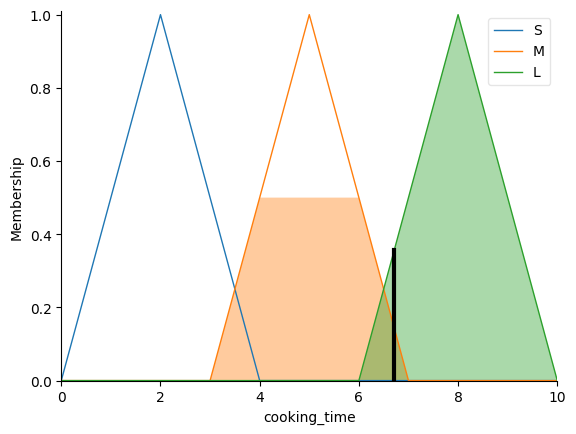

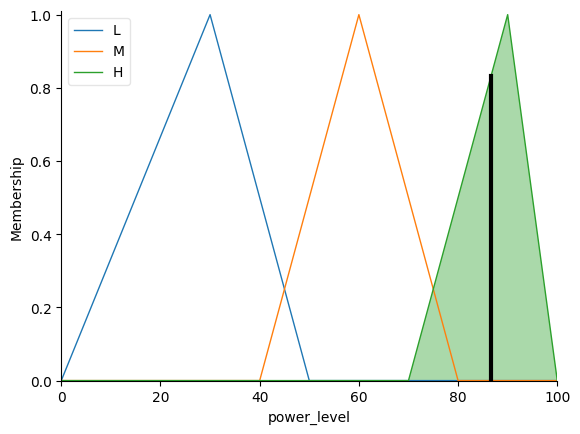

In [14]:
#Ví dụ 2.6:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

weight = ctrl.Antecedent(np.arange(0, 1001, 1), 'weight')
food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'food_type')
temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'temperature')

cooking_time = ctrl.Consequent(np.arange(0, 11, 1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(0, 101, 1), 'power_level')

weight['L'] = fuzz.trimf(weight.universe, [0, 200, 400])
weight['M'] = fuzz.trimf(weight.universe, [300, 500, 700])
weight['H'] = fuzz.trimf(weight.universe, [600, 800, 1000])

food_type['S'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['M'] = fuzz.trimf(food_type.universe, [0, 1, 2])
food_type['H'] = fuzz.trimf(food_type.universe, [1, 2, 2])

temperature['C'] = fuzz.trimf(temperature.universe, [0, 5, 10])
temperature['W'] = fuzz.trimf(temperature.universe, [20, 25, 30])
temperature['H'] = fuzz.trimf(temperature.universe, [40, 50, 60])

cooking_time['S'] = fuzz.trimf(cooking_time.universe, [0, 2, 4])
cooking_time['M'] = fuzz.trimf(cooking_time.universe, [3, 5, 7])
cooking_time['L'] = fuzz.trimf(cooking_time.universe, [6, 8, 10])

power_level['L'] = fuzz.trimf(power_level.universe, [0, 30, 50])
power_level['M'] = fuzz.trimf(power_level.universe, [40, 60, 80])
power_level['H'] = fuzz.trimf(power_level.universe, [70, 90, 100])

rule1 = ctrl.Rule(weight['L'], cooking_time['S'])
rule2 = ctrl.Rule(weight['M'], cooking_time['M'])
rule3 = ctrl.Rule(weight['H'], cooking_time['L'])

rule4 = ctrl.Rule(food_type['S'], power_level['L'])
rule5 = ctrl.Rule(food_type['M'], power_level['M'])
rule6 = ctrl.Rule(food_type['H'], power_level['H'])

rule7 = ctrl.Rule(temperature['C'], cooking_time['L'])
rule8 = ctrl.Rule(temperature['W'], cooking_time['M'])
rule9 = ctrl.Rule(temperature['H'], cooking_time['S'])

rule10a = ctrl.Rule(weight['H'] & food_type['H'] & temperature['C'], cooking_time['L'])
rule10b = ctrl.Rule(weight['H'] & food_type['H'] & temperature['C'], power_level['H'])

rule11a = ctrl.Rule(weight['M'] & food_type['S'] & temperature['W'], cooking_time['M'])
rule11b = ctrl.Rule(weight['M'] & food_type['S'] & temperature['W'], power_level['L'])

rule12a = ctrl.Rule(weight['L'] & food_type['M'] & temperature['H'], cooking_time['S'])
rule12b = ctrl.Rule(weight['L'] & food_type['M'] & temperature['H'], power_level['M'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10a, rule10b, rule11a, rule11b, rule12a, rule12b])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['weight'] = 600
fuzzy_system.input['food_type'] = 2
fuzzy_system.input['temperature'] = 5
fuzzy_system.compute()
print('TG nấu:', fuzzy_system.output['cooking_time'])
print('Mức công suất:', fuzzy_system.output['power_level'])
cooking_time.view(sim=fuzzy_system)
power_level.view(sim=fuzzy_system)

TG nấu: 1.0
Công suất: 52.14285714285715


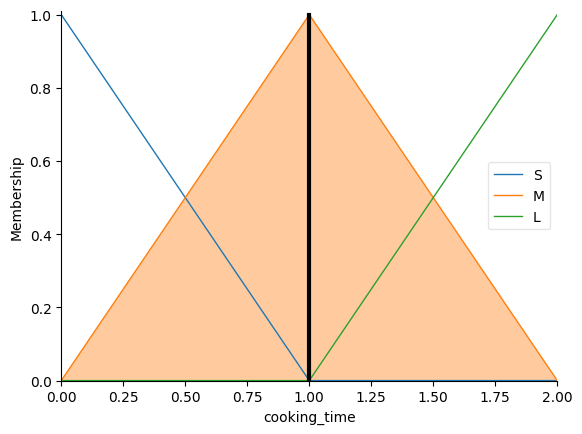

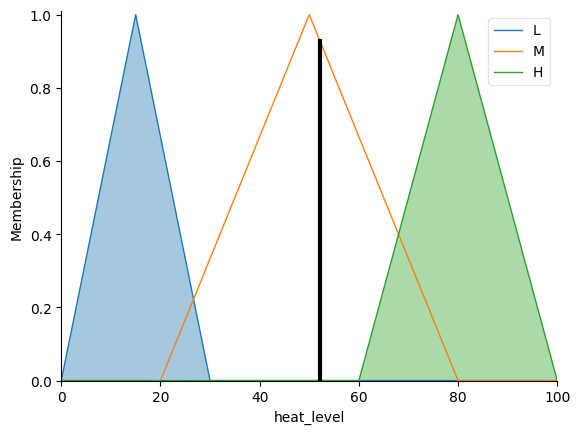

In [17]:
#Ví dụ 2.7:

import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(0, 3, 1), 'food_weight')
initial_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'initial_temp')
water_content = ctrl.Antecedent(np.arange(0, 3, 1), 'water_content')

cooking_time = ctrl.Consequent(np.arange(0, 3, 1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(0, 101, 1), 'heat_level')

food_type['S'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['M'] = fuzz.trimf(food_type.universe, [0, 1, 2])
food_type['H'] = fuzz.trimf(food_type.universe, [1, 2, 2])

food_weight['L'] = fuzz.trimf(food_weight.universe, [0, 0, 1])
food_weight['M'] = fuzz.trimf(food_weight.universe, [0, 1, 2])
food_weight['H'] = fuzz.trimf(food_weight.universe, [1, 2, 2])

initial_temp['C'] = fuzz.trimf(initial_temp.universe, [0, 5, 10])
initial_temp['W'] = fuzz.trimf(initial_temp.universe, [20, 25, 30])
initial_temp['H'] = fuzz.trimf(initial_temp.universe, [40, 45, 60])

water_content['L'] = fuzz.trimf(water_content.universe, [0, 0, 1])
water_content['M'] = fuzz.trimf(water_content.universe, [0, 1, 2])
water_content['H'] = fuzz.trimf(water_content.universe, [1, 2, 2])

cooking_time['S'] = fuzz.trimf(cooking_time.universe, [0, 0, 1])
cooking_time['M'] = fuzz.trimf(cooking_time.universe, [0, 1, 2])
cooking_time['L'] = fuzz.trimf(cooking_time.universe, [1, 2, 2])

heat_level['L'] = fuzz.trimf(heat_level.universe, [0, 15, 30])
heat_level['M'] = fuzz.trimf(heat_level.universe, [20, 50, 80])
heat_level['H'] = fuzz.trimf(heat_level.universe, [60, 80, 100])

rule1 = ctrl.Rule(food_weight['L'], cooking_time['S'])
rule2 = ctrl.Rule(food_weight['M'], cooking_time['M'])
rule3 = ctrl.Rule(food_weight['H'], cooking_time['L'])

rule4 = ctrl.Rule(food_type['S'], heat_level['L'])
rule5 = ctrl.Rule(food_type['M'], heat_level['M'])
rule6 = ctrl.Rule(food_type['H'], heat_level['H'])

rule7 = ctrl.Rule(initial_temp['C'], cooking_time['L'])
rule8 = ctrl.Rule(initial_temp['W'], cooking_time['M'])
rule9 = ctrl.Rule(initial_temp['H'], cooking_time['S'])

rule10 = ctrl.Rule(water_content['L'], heat_level['H'])
rule11 = ctrl.Rule(water_content['M'], heat_level['M'])
rule12 = ctrl.Rule(water_content['H'], heat_level['L'])

rule13 = ctrl.Rule(food_weight['H'] & food_type['H'] & initial_temp['C'], (cooking_time['L'], heat_level['H']))
rule14 = ctrl.Rule(food_weight['M'] & food_type['S'] & initial_temp['W'], (cooking_time['M'], heat_level['L']))
rule15 = ctrl.Rule(food_weight['L'] & food_type['M'] & initial_temp['H'], (cooking_time['S'], heat_level['M']))

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['food_type'] = 2
fuzzy_system.input['food_weight'] = 1
fuzzy_system.input['initial_temp'] = 0
fuzzy_system.input['water_content'] = 2
fuzzy_system.compute()
print('TG nấu:', fuzzy_system.output['cooking_time'])
print('Công suất:', fuzzy_system.output['heat_level'])
cooking_time.view(sim=fuzzy_system)
heat_level.view(sim=fuzzy_system)

Liều dùng thuốc: 8.000000000000002
Đc dịch truyền: 8.000000000000002
Liệu pháp oxy: 8.000000000000002


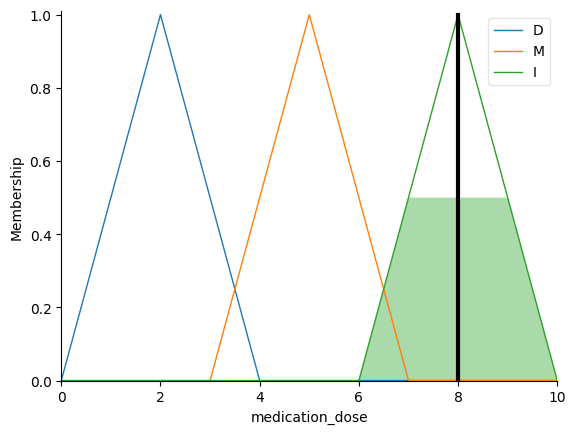

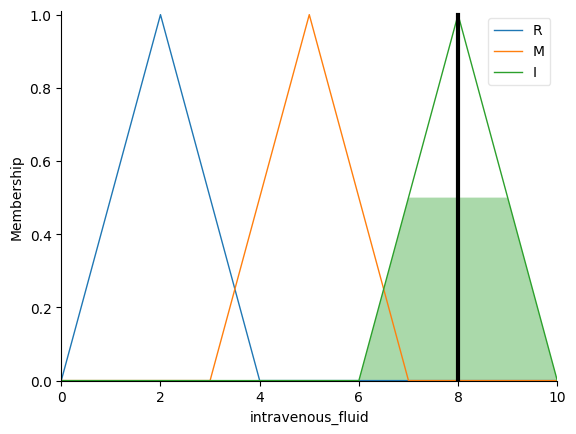

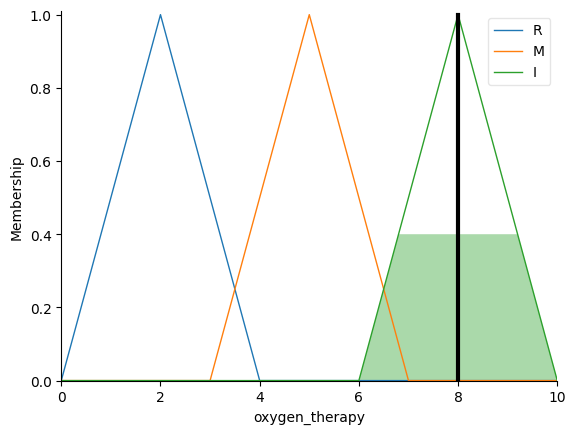

In [26]:
#Ví dụ 2.8:

import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

heart_rate = ctrl.Antecedent(np.arange(0, 151, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(0, 181, 1), 'blood_pressure')
body_temp = ctrl.Antecedent(np.arange(30, 43, 0.1), 'body_temp')
oxygen_saturation = ctrl.Antecedent(np.arange(0, 101, 1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(0, 251, 1), 'blood_sugar')

medication_dose = ctrl.Consequent(np.arange(0, 11, 1), 'medication_dose')
intravenous_fluid = ctrl.Consequent(np.arange(0, 11, 1), 'intravenous_fluid')
oxygen_therapy = ctrl.Consequent(np.arange(0, 11, 1), 'oxygen_therapy')

heart_rate['L'] = fuzz.trimf(heart_rate.universe, [0, 50, 60])
heart_rate['N'] = fuzz.trimf(heart_rate.universe, [50, 80, 100])
heart_rate['H'] = fuzz.trimf(heart_rate.universe, [90, 110, 150])

blood_pressure['L'] = fuzz.trimf(blood_pressure.universe, [0, 80, 90])
blood_pressure['N'] = fuzz.trimf(blood_pressure.universe, [80, 100, 120])
blood_pressure['H'] = fuzz.trimf(blood_pressure.universe, [120, 140, 180])

body_temp['L'] = fuzz.trimf(body_temp.universe, [30, 35, 36])
body_temp['N'] = fuzz.trimf(body_temp.universe, [36, 36.8, 37.5])
body_temp['H'] = fuzz.trimf(body_temp.universe, [37, 38, 42])

oxygen_saturation['L'] = fuzz.trimf(oxygen_saturation.universe, [0, 85, 90])
oxygen_saturation['N'] = fuzz.trimf(oxygen_saturation.universe, [90, 95, 100])

blood_sugar['L'] = fuzz.trimf(blood_sugar.universe, [0, 50, 70])
blood_sugar['N'] = fuzz.trimf(blood_sugar.universe, [70, 100, 140])
blood_sugar['H'] = fuzz.trimf(blood_sugar.universe, [140, 180, 250])

medication_dose['D'] = fuzz.trimf(medication_dose.universe, [0, 2, 4])
medication_dose['M'] = fuzz.trimf(medication_dose.universe, [3, 5, 7])
medication_dose['I'] = fuzz.trimf(medication_dose.universe, [6, 8, 10])

intravenous_fluid['R'] = fuzz.trimf(intravenous_fluid.universe, [0, 2, 4])
intravenous_fluid['M'] = fuzz.trimf(intravenous_fluid.universe, [3, 5, 7])
intravenous_fluid['I'] = fuzz.trimf(intravenous_fluid.universe, [6, 8, 10])

oxygen_therapy['R'] = fuzz.trimf(oxygen_therapy.universe, [0, 2, 4])
oxygen_therapy['M'] = fuzz.trimf(oxygen_therapy.universe, [3, 5, 7])
oxygen_therapy['I'] = fuzz.trimf(oxygen_therapy.universe, [6, 8, 10])

rule1 = ctrl.Rule(heart_rate['L'] & blood_pressure['L'], (intravenous_fluid['I'], medication_dose['I']))
rule2 = ctrl.Rule(heart_rate['H'] & blood_pressure['H'], medication_dose['D'])
rule3 = ctrl.Rule(heart_rate['N'] & blood_pressure['N'], medication_dose['M'])
rule4 = ctrl.Rule(body_temp['H'] & oxygen_saturation['L'], (oxygen_therapy['I'], medication_dose['I']))
rule5 = ctrl.Rule(body_temp['N'] & oxygen_saturation['N'], medication_dose['M'])
rule6 = ctrl.Rule(body_temp['L'] & oxygen_saturation['L'], (oxygen_therapy['I'], intravenous_fluid['I']))
rule7 = ctrl.Rule(blood_sugar['H'], medication_dose['I'])
rule8 = ctrl.Rule(blood_sugar['L'], medication_dose['D'])
rule9 = ctrl.Rule(blood_sugar['N'], medication_dose['M'])
rule10 = ctrl.Rule(blood_pressure['H'] & blood_sugar['H'] & heart_rate['H'], medication_dose['D'])
rule11 = ctrl.Rule(blood_pressure['L'] & oxygen_saturation['L'] & heart_rate['L'], (intravenous_fluid['I'], oxygen_therapy['I'], medication_dose['I']))
rule12 = ctrl.Rule(body_temp['H'] & blood_pressure['H'] & oxygen_saturation['N'], medication_dose['I'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['heart_rate'] = 50
fuzzy_system.input['blood_pressure'] = 85
fuzzy_system.input['body_temp'] = 38
fuzzy_system.input['oxygen_saturation'] = 88
fuzzy_system.input['blood_sugar'] = 150
fuzzy_system.compute()
print('Liều dùng thuốc:', fuzzy_system.output['medication_dose'])
print('Đc dịch truyền:', fuzzy_system.output['intravenous_fluid'])
print('Liệu pháp oxy:', fuzzy_system.output['oxygen_therapy'])
medication_dose.view(sim=fuzzy_system)
intravenous_fluid.view(sim=fuzzy_system)
oxygen_therapy.view(sim=fuzzy_system)

Đánh giá: 0.4125


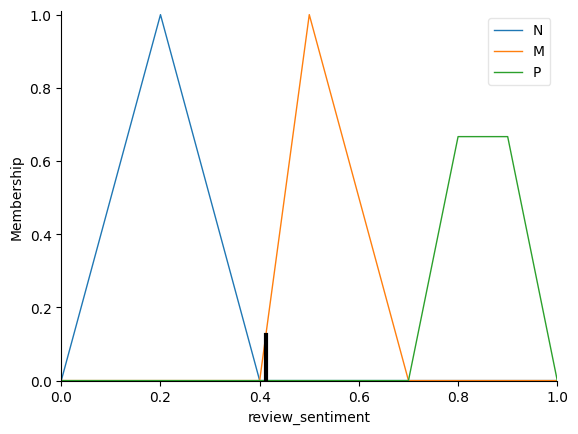

In [27]:
#Ví dụ 2.9:

import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 11, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 11, 1), 'negative_words')

review_sentiment = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'review_sentiment')

sentiment_score['N'] = fuzz.trimf(sentiment_score.universe, [0, 0.15, 0.3])
sentiment_score['M'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.5, 0.7])
sentiment_score['P'] = fuzz.trimf(sentiment_score.universe, [0.7, 0.85, 1])

emotion_intensity['L'] = fuzz.trimf(emotion_intensity.universe, [0, 0.2, 0.4])
emotion_intensity['M'] = fuzz.trimf(emotion_intensity.universe, [0.4, 0.5, 0.7])
emotion_intensity['H'] = fuzz.trimf(emotion_intensity.universe, [0.7, 0.85, 1])

positive_words['F'] = fuzz.trimf(positive_words.universe, [0, 0, 3])
positive_words['S'] = fuzz.trimf(positive_words.universe, [2, 4, 6])
positive_words['M'] = fuzz.trimf(positive_words.universe, [5, 10, 10])

negative_words['F'] = fuzz.trimf(negative_words.universe, [0, 0, 3])
negative_words['S'] = fuzz.trimf(negative_words.universe, [2, 4, 6])
negative_words['M'] = fuzz.trimf(negative_words.universe, [5, 10, 10])

review_sentiment['N'] = fuzz.trimf(review_sentiment.universe, [0, 0.2, 0.4])
review_sentiment['M'] = fuzz.trimf(review_sentiment.universe, [0.4, 0.5, 0.7])
review_sentiment['P'] = fuzz.trimf(review_sentiment.universe, [0.7, 0.85, 1])

rule1 = ctrl.Rule(sentiment_score['N'] & emotion_intensity['H'], review_sentiment['N'])
rule2 = ctrl.Rule(sentiment_score['N'] & emotion_intensity['L'], review_sentiment['M'])
rule3 = ctrl.Rule(sentiment_score['M'] & emotion_intensity['M'], review_sentiment['M'])
rule4 = ctrl.Rule(sentiment_score['P'] & emotion_intensity['H'], review_sentiment['P'])

rule5 = ctrl.Rule(positive_words['M'] & negative_words['F'], review_sentiment['P'])
rule6 = ctrl.Rule(positive_words['F'] & negative_words['M'], review_sentiment['N'])
rule7 = ctrl.Rule(positive_words['S'] & negative_words['S'], review_sentiment['M'])

rule8 = ctrl.Rule(sentiment_score['N'] & negative_words['M'] & emotion_intensity['H'], review_sentiment['N'])
rule9 = ctrl.Rule(sentiment_score['M'] & emotion_intensity['M'] & positive_words['S'], review_sentiment['M'])
rule10 = ctrl.Rule(sentiment_score['P'] & positive_words['M'] & emotion_intensity['H'], review_sentiment['P'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['sentiment_score'] = 0.6
fuzzy_system.input['emotion_intensity'] = 0.7
fuzzy_system.input['positive_words'] = 4
fuzzy_system.input['negative_words'] = 1
fuzzy_system.compute()
print('Đánh giá:', fuzzy_system.output['review_sentiment'])
review_sentiment.view(sim=fuzzy_system)

Thời gian giao hàng dự đoán: 17.111111111111107
Tiền thưởng dự đoán: 50.00000000000002
Xếp hạng tài xế dự đoán: 3.0


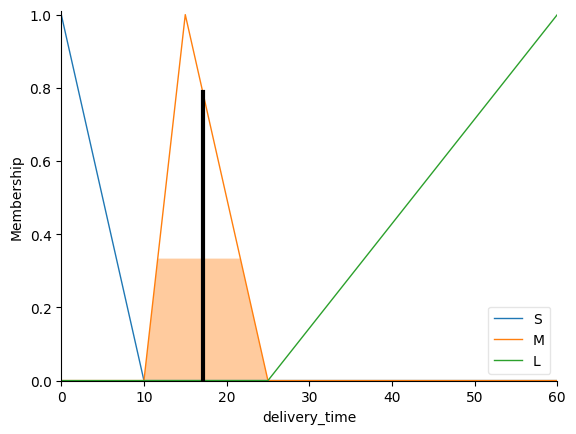

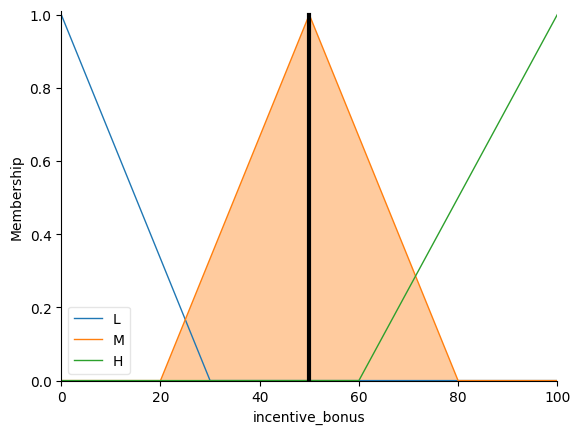

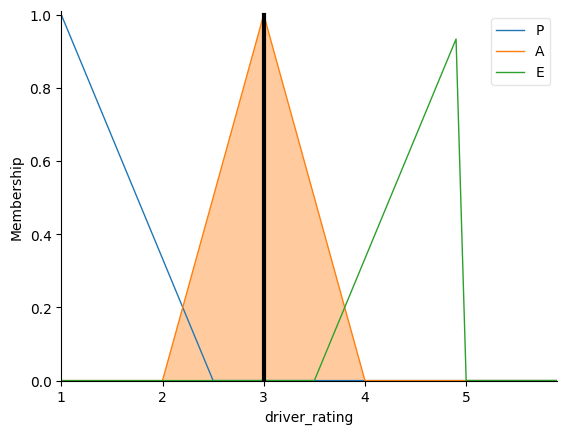

In [28]:
#Ví dụ 2.10:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic')
distance = ctrl.Antecedent(np.arange(0, 21, 1), 'distance')
weather = ctrl.Antecedent(np.arange(0, 3, 1), 'weather')
prep_time = ctrl.Antecedent(np.arange(0, 21, 1), 'prep_time')
driver_fatigue = ctrl.Antecedent(np.arange(0, 101, 1), 'driver_fatigue')

delivery_time = ctrl.Consequent(np.arange(0, 61, 1), 'delivery_time')
incentive_bonus = ctrl.Consequent(np.arange(0, 101, 1), 'incentive_bonus')
driver_rating = ctrl.Consequent(np.arange(1, 6, 0.1), 'driver_rating')

traffic['L'] = fuzz.trimf(traffic.universe, [0, 0, 30])
traffic['M'] = fuzz.trimf(traffic.universe, [20, 50, 80])
traffic['H'] = fuzz.trimf(traffic.universe, [60, 100, 100])

distance['S'] = fuzz.trimf(distance.universe, [0, 0, 5])
distance['M'] = fuzz.trimf(distance.universe, [3, 10, 15])
distance['L'] = fuzz.trimf(distance.universe, [10, 20, 20])

weather['C'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['R'] = fuzz.trimf(weather.universe, [0, 1, 2])
weather['S'] = fuzz.trimf(weather.universe, [1, 2, 2])

prep_time['F'] = fuzz.trimf(prep_time.universe, [0, 0, 5])
prep_time['M'] = fuzz.trimf(prep_time.universe, [5, 10, 15])
prep_time['S'] = fuzz.trimf(prep_time.universe, [10, 20, 20])

driver_fatigue['L'] = fuzz.trimf(driver_fatigue.universe, [0, 0, 30])
driver_fatigue['M'] = fuzz.trimf(driver_fatigue.universe, [20, 50, 80])
driver_fatigue['H'] = fuzz.trimf(driver_fatigue.universe, [60, 100, 100])

delivery_time['S'] = fuzz.trimf(delivery_time.universe, [0, 0, 10])
delivery_time['M'] = fuzz.trimf(delivery_time.universe, [10, 15, 25])
delivery_time['L'] = fuzz.trimf(delivery_time.universe, [25, 60, 60])

incentive_bonus['L'] = fuzz.trimf(incentive_bonus.universe, [0, 0, 30])
incentive_bonus['M'] = fuzz.trimf(incentive_bonus.universe, [20, 50, 80])
incentive_bonus['H'] = fuzz.trimf(incentive_bonus.universe, [60, 100, 100])

driver_rating['P'] = fuzz.trimf(driver_rating.universe, [1, 1, 2.5])
driver_rating['A'] = fuzz.trimf(driver_rating.universe, [2, 3, 4])
driver_rating['E'] = fuzz.trimf(driver_rating.universe, [3.5, 5, 5])

rule1 = ctrl.Rule(traffic['L'] & distance['S'], delivery_time['S'])
rule2 = ctrl.Rule(traffic['M'] & distance['M'], delivery_time['M'])
rule3 = ctrl.Rule(traffic['H'] & distance['L'], delivery_time['L'])
rule4 = ctrl.Rule(weather['C'], incentive_bonus['L'])
rule5 = ctrl.Rule(weather['R'], incentive_bonus['M'])
rule6 = ctrl.Rule(weather['S'], incentive_bonus['H'])
rule7 = ctrl.Rule(prep_time['F'] & traffic['L'], delivery_time['S'])
rule8 = ctrl.Rule(prep_time['M'] & traffic['M'], delivery_time['M'])
rule9 = ctrl.Rule(prep_time['S'] & traffic['H'], delivery_time['L'])
rule10 = ctrl.Rule(driver_fatigue['L'], driver_rating['E'])
rule11 = ctrl.Rule(driver_fatigue['M'], driver_rating['A'])
rule12 = ctrl.Rule(driver_fatigue['H'], driver_rating['P'])

rule13a = ctrl.Rule(distance['L'] & weather['S'] & traffic['H'], delivery_time['L'])
rule13b = ctrl.Rule(distance['L'] & weather['S'] & traffic['H'], incentive_bonus['H'])

rule14a = ctrl.Rule(distance['S'] & weather['C'] & traffic['L'], delivery_time['S'])
rule14b = ctrl.Rule(distance['S'] & weather['C'] & traffic['L'], incentive_bonus['L'])

rule15a = ctrl.Rule(driver_fatigue['H'] & traffic['H'], driver_rating['P'])
rule15b = ctrl.Rule(driver_fatigue['H'] & traffic['H'], delivery_time['L'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13a, rule13b, rule14a, rule14b, rule15a, rule15b])
fuzzy_simulation = ctrl.ControlSystemSimulation(control_system)
fuzzy_simulation.input['traffic'] = 70
fuzzy_simulation.input['distance'] = 10
fuzzy_simulation.input['weather'] = 1
fuzzy_simulation.input['prep_time'] = 8
fuzzy_simulation.input['driver_fatigue'] = 50
fuzzy_simulation.compute()
print('Thời gian giao hàng dự đoán:', fuzzy_simulation.output['delivery_time'])
print('Tiền thưởng dự đoán:', fuzzy_simulation.output['incentive_bonus'])
print('Xếp hạng tài xế dự đoán:', fuzzy_simulation.output['driver_rating'])
delivery_time.view(sim=fuzzy_simulation)
incentive_bonus.view(sim=fuzzy_simulation)
driver_rating.view(sim=fuzzy_simulation)

Giá cuối cùng dự đoán: 45.75702827087447


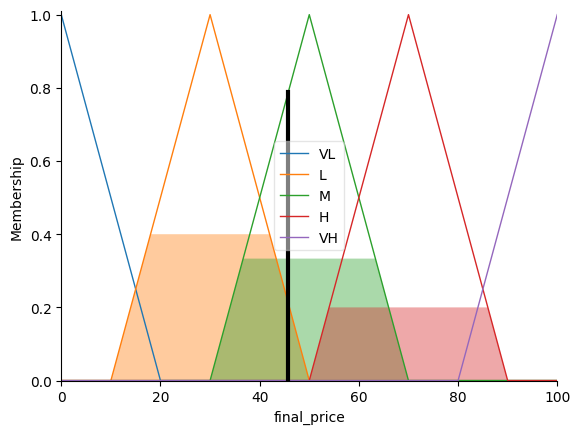

In [29]:
#Ví dụ 2.11:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

market_demand = ctrl.Antecedent(np.arange(0, 101, 1), 'market_demand')
competitor_price = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0, 101, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 3, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 101, 1), 'stock_level')

final_price = ctrl.Consequent(np.arange(0, 101, 1), 'final_price')

market_demand['L'] = fuzz.trimf(market_demand.universe, [0, 0, 50])
market_demand['M'] = fuzz.trimf(market_demand.universe, [20, 50, 80])
market_demand['H'] = fuzz.trimf(market_demand.universe, [50, 100, 100])

competitor_price['L'] = fuzz.trimf(competitor_price.universe, [0, 0, 50])
competitor_price['M'] = fuzz.trimf(competitor_price.universe, [20, 50, 80])
competitor_price['H'] = fuzz.trimf(competitor_price.universe, [50, 100, 100])

production_cost['L'] = fuzz.trimf(production_cost.universe, [0, 0, 50])
production_cost['M'] = fuzz.trimf(production_cost.universe, [20, 50, 80])
production_cost['H'] = fuzz.trimf(production_cost.universe, [50, 100, 100])

seasonality['O'] = fuzz.trimf(seasonality.universe, [0, 0, 1])
seasonality['N'] = fuzz.trimf(seasonality.universe, [0, 1, 2])
seasonality['P'] = fuzz.trimf(seasonality.universe, [1, 2, 2])

stock_level['L'] = fuzz.trimf(stock_level.universe, [0, 0, 50])
stock_level['M'] = fuzz.trimf(stock_level.universe, [20, 50, 80])
stock_level['H'] = fuzz.trimf(stock_level.universe, [50, 100, 100])

final_price['VL'] = fuzz.trimf(final_price.universe, [0, 0, 20])
final_price['L'] = fuzz.trimf(final_price.universe, [10, 30, 50])
final_price['M'] = fuzz.trimf(final_price.universe, [30, 50, 70])
final_price['H'] = fuzz.trimf(final_price.universe, [50, 70, 90])
final_price['VH'] = fuzz.trimf(final_price.universe, [80, 100, 100])

rule1 = ctrl.Rule(market_demand['H'] & competitor_price['H'] & stock_level['L'], final_price['VH'])
rule2 = ctrl.Rule(market_demand['H'] & seasonality['P'] & stock_level['L'], final_price['VH'])
rule3 = ctrl.Rule(market_demand['M'] & production_cost['H'] & stock_level['L'], final_price['VH'])
rule4 = ctrl.Rule(market_demand['H'] & competitor_price['M'] & stock_level['M'], final_price['H'])
rule5 = ctrl.Rule(market_demand['M'] & competitor_price['H'] & stock_level['L'], final_price['H'])
rule6 = ctrl.Rule(market_demand['M'] & seasonality['P'] & stock_level['M'], final_price['H'])
rule7 = ctrl.Rule(market_demand['M'] & competitor_price['M'] & stock_level['M'], final_price['M'])
rule8 = ctrl.Rule(market_demand['M'] & competitor_price['H'] & stock_level['M'], final_price['M'])
rule9 = ctrl.Rule(market_demand['L'] & competitor_price['H'] & stock_level['M'], final_price['M'])
rule10 = ctrl.Rule(market_demand['M'] & production_cost['M'] & stock_level['M'], final_price['M'])
rule11 = ctrl.Rule(market_demand['L'] & competitor_price['L'] & stock_level['H'], final_price['L'])
rule12 = ctrl.Rule(market_demand['M'] & production_cost['M'] & stock_level['H'], final_price['L'])
rule13 = ctrl.Rule(market_demand['L'] & seasonality['O'] & stock_level['H'], final_price['L'])
rule14 = ctrl.Rule(market_demand['L'] & competitor_price['L'] & stock_level['H'], final_price['VL'])
rule15 = ctrl.Rule(market_demand['L'] & seasonality['O'] & stock_level['H'], final_price['VL'])
rule16 = ctrl.Rule(market_demand['M'] & competitor_price['L'] & stock_level['H'], final_price['VL'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['market_demand'] = 60
fuzzy_system.input['competitor_price'] = 50
fuzzy_system.input['production_cost'] = 40
fuzzy_system.input['seasonality'] = 1
fuzzy_system.input['stock_level'] = 70
fuzzy_system.compute()
print('Giá cuối cùng dự đoán:', fuzzy_system.output['final_price'])
final_price.view(sim=fuzzy_system)